<a href="https://colab.research.google.com/github/mmapontes/data_science/blob/main/An%C3%A1lise_de_Dados_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados Airbnb - Lisboa**

<center><img alt="Analisando Airbnb" width="100%" src="https://cdn.pixabay.com/photo/2014/04/30/16/15/yard-of-the-palace-335041_1280.jpg"></center>


O [Airbnb](https://www.airbnb.com/) é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.

Atualmente com seu modelo de negócios, fez com que fosse reconhecida como a **maior empresa de acomodações da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar uma grande quantidade de dados do site, para algumas das principais cidades do mundo através do portal [Inside Airbnb](http://insideairbnb.com/), contribuindo com dados para desenvolvimento de projetos e soluções de *Data Science*.

**Neste *notebook*, iremos realizar uma análise descritiva e exploratória dos dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados foram compilados em 20 de dezembro de 2020 e obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*


In [ ]:
# importação de pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-12-20/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar a análise, vamos verificar a organização do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,79,3,26,2020-01-03,0.34,1,355
1,25659,Heart of Alfama - Coeur d'Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,50,3,113,2019-12-08,1.39,1,363
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,42,3,324,2020-11-01,2.67,1,348
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,36,2,260,2020-12-14,2.49,2,327
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,39,2020-12-17,0.31,1,270


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que utilizamos é a versão "resumida" disponível no site Inside Airbnb, apresenta 20141 entradas com 16 colunas.

In [ ]:
# identificar o volume de dados do dataframe
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20141
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Em seguida iremos avaliar a qualidade do nosso *dataset*. A qual está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 17,4% das linhas;
* As variáveis `name` e `host_name` tem aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.174470
last_review                       0.174470
name                              0.000496
host_name                         0.000050
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, iremos plotar os histogramas.

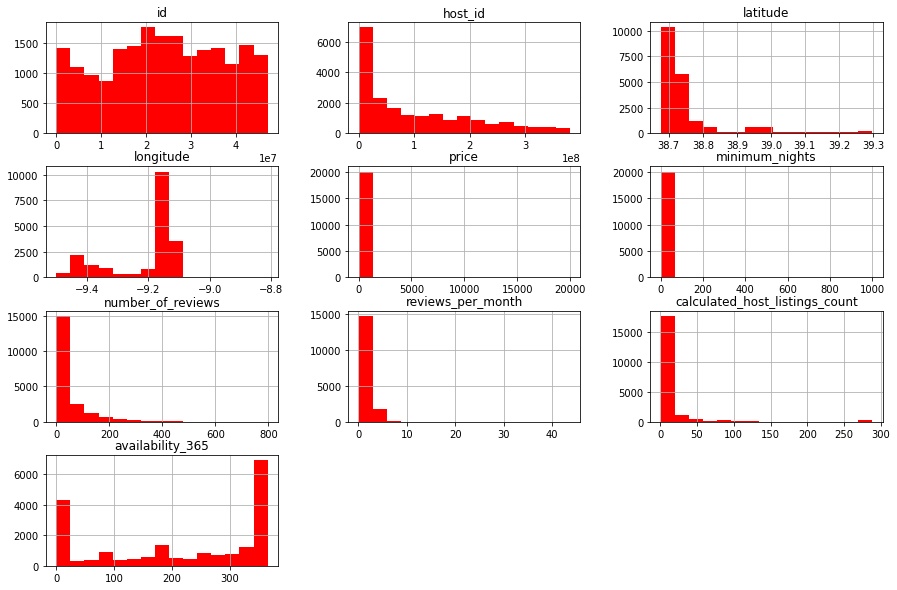

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10), color = 'r');

### **Q4. Há *outliers* presentes?**

Pela análise da distribuição dos histogramas, é possível verificar indícios da presença de *outliers*. 

Por exemplo nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`os valores não seguem uma distribuição, e distorcem toda a representação gráfica.

Existem duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20141.000000,20141.000000,20141.000000,16627.000000,20141.000000,20141.000000
mean,103.149695,3.703689,43.260911,1.227901,13.577826,214.359913
std,332.983121,18.163081,68.297796,1.328587,37.528400,143.068871
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,2.000000,0.260000,1.000000,76.000000
50%,66.000000,2.000000,13.000000,0.780000,3.000000,262.000000
75%,100.000000,3.000000,56.000000,1.830000,10.000000,356.000000
max,19988.000000,1000.000000,797.000000,43.640000,288.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 100, porém seu valor máximo é 19988.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


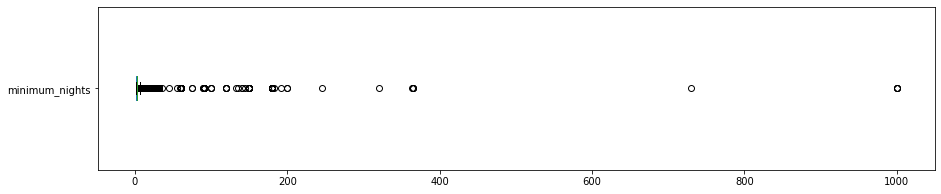

minimum_nights: valores acima de 30:
102 entradas
0.5064%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

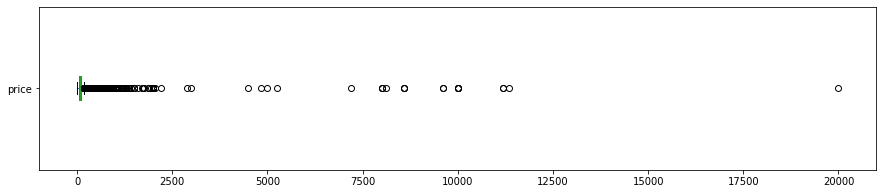


Price: valores acima de 500
236 entradas
1.1717%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 500 para price
print("\nPrice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *dataset* delas e plotar novamente o histograma.

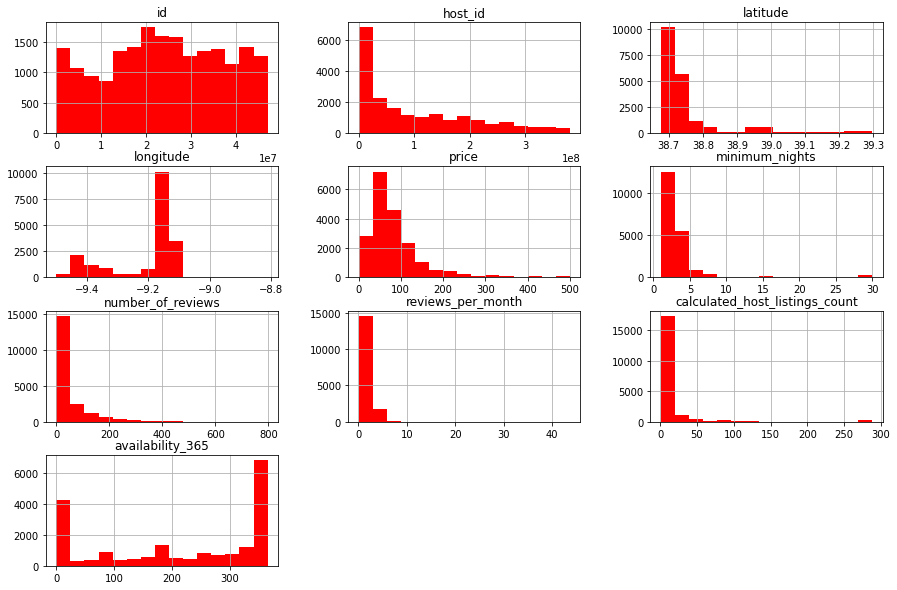

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), color = 'r');

### **Q4. Qual a correlação existente entre as variáveis?**

A análise de correlação busca identificar a existência de relação entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. 

Para identificar as correlações existentes entre as variáveis de interesse, será criada uma matriz de correlação e a partir desta será plotado um *heatmap* utilizando a biblioteca `seaborn`.


In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.025249,-0.132901,-0.157292,0.022802,0.029478
minimum_nights,-0.025249,1.000000,-0.049314,-0.085262,-0.044299,-0.024884
number_of_reviews,-0.132901,-0.049314,1.000000,0.794299,-0.088092,-0.017888
reviews_per_month,-0.157292,-0.085262,0.794299,1.000000,-0.092188,-0.021608
calculated_host_listings_count,0.022802,-0.044299,-0.088092,-0.092188,1.000000,0.045100
availability_365,0.029478,-0.024884,-0.017888,-0.021608,0.045100,1.000000


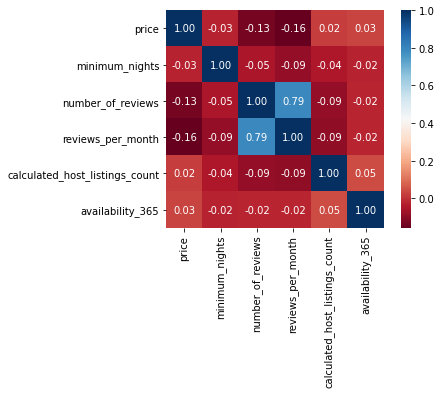

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado em Lisboa pelo Airbnb?**

Se você já alugou na plataforma do Airbnb, sabe que existem opções de apartamentos/casas inteiras, aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

A coluna da variável `room_type` indica o tipo de locação que está anunciada na plataforma. 

A partir destes dados vamos verificar a quantidade de ocorrências de cada tipo de aluguel, utilizando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14728
Private room        4311
Hotel room           420
Shared room          345
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.743688
Private room       0.217683
Hotel room         0.021208
Shared room        0.017421
Name: room_type, dtype: float64

A partir da análise destes dados é possivel verificar que aproximadamente **74%** dos anúncios publicados são realizados para locação de casas/apartamentos inteiros e **21%** correspondem a locação de quartos individuais.

### **Q6. Qual a localidade mais cara de Lisboa?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) em função da média do preço de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Cardosas                                           280.000000
Ota                                                249.000000
Vermelha                                           242.500000
Alguber                                            220.000000
Aveiras de Baixo                                   213.000000
Vale do Paraso                                     201.000000
Arranh                                             168.000000
Alhandra, So Joo dos Montes e Calhandriz           153.750000
Maxial e Monte Redondo                             146.500000
Dois Portos e Runa                                 143.272727
So Pedro da Cadeira                                141.136364
Turcifal                                           136.375000
Enxara do Bispo, Gradil e Vila Franca do Rosrio    133.611111
Mafra                                              130.934211
Santa Brbara                                       129.818182
Name: price, dtype: float64

Acima, vemos que as localidades como Cardosas, Ota e Vermelha, estão com média de preço superior a de lugares como Baixa, Bairro Alto e Chiado.

Uma pessoa que não conhece Lisboa poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Cardosas.

In [ ]:
# verificar quantidade de imóveis no bairro Cardosas
print(df_clean[df_clean.neighbourhood == 'Cardosas'].shape)

# verificar os imóveis no bairro Cardosas
df_clean[df_clean.neighbourhood == 'Cardosas']

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8693,21510142,Casal do Portinho # 15/20PAX 30min LISBOA,150414336,Patricia,Cardosas,38.97631,-9.03844,Entire home/apt,280,2,42,2020-10-12,1.1,1,336


### **Q7. Qual a localidade com mais opções em Lisboa?**

In [ ]:
df_clean.neighbourhood.value_counts().head(10)

Santa Maria Maior                                    3261
Misericrdia                                          2383
Arroios                                              1739
Cascais e Estoril                                    1279
So Vicente                                           1208
Santo Antnio                                         1167
Estrela                                               830
Ericeira                                              718
Avenidas Novas                                        614
S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim     520
Name: neighbourhood, dtype: int64

### **Plotagem pela localização**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

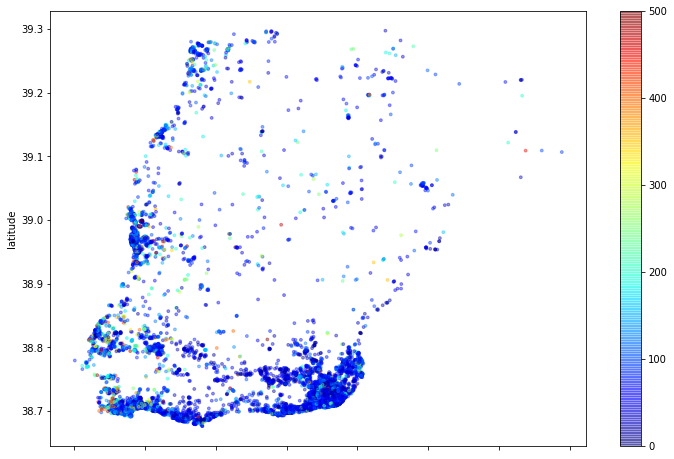

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi realizada uma análise superficial na base de dados do Airbnb, porém foi percebido a presença de *outliers* em parte das variáveis. Através da visualização, foi possível extrair algumas informações interessantes sobre as acomodações disponíveis na plataforma para a região de Lisboa.

Também se notou em algumas localidades pouca disponibilidade de imóveis, o que pode distorcer as informações estatísticas de alguns atributos.

A grande maioria dos imóveis disponíveis para locação são casas/apartamentos inteiros ou quartos privativos, sendo bem baixo o número de quartos de hotéis e acomodações compartilhadas. Isso revela que os visitantes têm maior preferência por acomodações individuais.

Cardosas é a localidade com o valor médio de locação mais elevado, com custo de € 280 (valor acima da média da cidade de Lisboa, ao custo de € 66 por dia). Para quem procura acomodações a um custo mais acessível, as localidades em Póvoa de Santo Adrião e Olival Basto e Painho e Figueiros, apresentam menor valor médio para locação, aproximadamente € 35.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
